for reference visit https://www.kaggle.com/code/rishabhkothari103/hepatitis-c-prediction

# Importing necessart libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Basic EDA

In [2]:
df=pd.read_csv("/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv")

In [3]:
df.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.shape

(615, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [8]:
df=df.dropna()
df.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [9]:
df.shape

(589, 14)

In [10]:
df.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.head(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


Mapping appropriate values

In [13]:
df.Sex.replace(('m','f'),(0,1),inplace=True)

<ipython-input-13-ea3eaeff15b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace(('m','f'),(0,1),inplace=True)
<ipython-input-13-ea3eaeff15b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace(('m','f'),(0,1),inplace=True)


In [14]:
df['Category'].value_counts()

Category
0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [15]:
df['Category']=[0 if i=="0=Blood Donor" or i=="0s=suspect Blood Donor" else 
               1 if i=="1=Hepatitis" else 
               2 if i=="2=Fibrosis" else
               3 for i in df['Category']]

In [16]:
df['Category'].value_counts()

Category
0    533
3     24
1     20
2     12
Name: count, dtype: int64

In [17]:
df.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Choosing important columns

<Axes: >

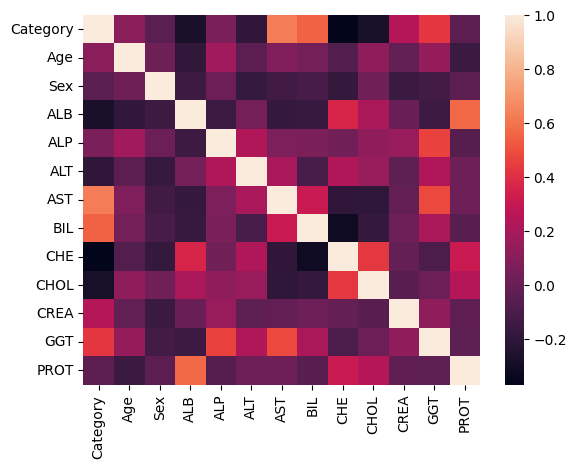

In [18]:
sns.heatmap(df.corr())

In [19]:
df.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.106264,-0.044617,-0.276111,0.053745,-0.198341,0.628535,0.549021,-0.369752,-0.283626,0.243989,0.424393,-0.039483
Age,0.106264,1.000000,0.014288,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
Sex,-0.044617,0.014288,1.000000,-0.150091,0.007601,-0.177107,-0.129883,-0.108063,-0.181649,0.030447,-0.158068,-0.128142,-0.043296
ALB,-0.276111,-0.191094,-0.150091,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,0.053745,0.177720,0.007601,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.198341,-0.040576,-0.177107,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.628535,0.072739,-0.129883,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.549021,0.039655,-0.108063,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,-0.369752,-0.075863,-0.181649,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,-0.283626,0.124742,0.030447,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050


In [20]:
df_necessary=df.drop(['PROT','ALP','Sex'],axis=1)
df_necessary.head(2)

,Category,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,0,32,38.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1
1,0,32,38.5,18.0,24.7,3.9,11.17,4.80,74.0,15.6


# Splitting data for training and testing

In [21]:
from sklearn.model_selection import train_test_split

X=df.drop("Category",axis=1)
y=df['Category']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Search Vector CLassifier

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [24]:
y_pred=grid_search.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9594594594594594


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[128   0   0   0]
 [  2   3   3   0]
 [  0   1   3   0]
 [  0   0   0   8]]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1 = f1_score(y_test, y_pred, average='macro')                

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.8086538461538462
Recall: 0.78125
F1-Score: 0.773062015503876


# XGboost

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier,plot_tree

In [29]:
import warnings
warnings.filterwarnings("ignore")


In [30]:
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
}

model = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid_XGB, cv=3, scoring='accuracy', verbose=1)
model.fit(X_train, y_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [31]:
# Best parameters found by GridSearchCV
print("Best parameters:", model.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [32]:
y_pred2=model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9256756756756757


In [34]:
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[128   0   0   0]
 [  2   3   3   0]
 [  1   3   0   0]
 [  1   0   1   6]]


In [35]:
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')        
f1 = f1_score(y_test, y_pred2, average='macro')                

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.6174242424242424
Recall: 0.53125
F1-Score: 0.5675824175824176


In [36]:
X=df_necessary.drop("Category",axis=1)
y=df_necessary['Category']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
model3=SVC(C=10,gamma='scale',kernel='rbf')
model3.fit(X_train, y_train)

SVC(C=10)

In [39]:
y_pred3=model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9527027027027027


In [40]:
precision = precision_score(y_test, y_pred3, average='macro')  # or 'micro', 'weighted'
recall = recall_score(y_test, y_pred3, average='macro')        # or 'micro', 'weighted'
f1 = f1_score(y_test, y_pred3, average='macro')                # or 'micro', 'weighted'

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.8067748091603053
Recall: 0.75
F1-Score: 0.7554375804375804


# Random Forest CLassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=80,
    max_features=3,
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=300,
    random_state=42  
)

In [42]:
X=df.drop("Category",axis=1)
y=df['Category']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model4.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=300, random_state=42)

In [45]:
y_pred4=model.predict(X_test)

In [46]:

accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.9152542372881356


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred4, average='macro')  # or 'micro', 'weighted'
recall = recall_score(y_test, y_pred4, average='macro')        # or 'micro', 'weighted'
f1 = f1_score(y_test, y_pred4, average='macro')                # or 'micro', 'weighted'

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.6404761904761904
Recall: 0.5104166666666666
F1-Score: 0.5605302464525765


# CONCLUSION 
the best model is SVC with Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
